In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

df = sns.load_dataset("titanic")
SEED = 42
df_train , df_test = train_test_split(df,random_state=SEED, test_size = 0.2)
df_train

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
331,0,1,male,45.5,0,0,28.5000,S,First,man,True,C,Southampton,no,True
733,0,2,male,23.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
382,0,3,male,32.0,0,0,7.9250,S,Third,man,True,NaN,Southampton,no,True
704,0,3,male,26.0,1,0,7.8542,S,Third,man,True,NaN,Southampton,no,False
813,0,3,female,6.0,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,3,female,21.0,0,0,7.6500,S,Third,woman,False,NaN,Southampton,yes,True
270,0,1,male,NaN,0,0,31.0000,S,First,man,True,NaN,Southampton,no,True
860,0,3,male,41.0,2,0,14.1083,S,Third,man,True,NaN,Southampton,no,False
435,1,1,female,14.0,1,2,120.0000,S,First,child,False,B,Southampton,yes,False


In [2]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [4]:
df_train

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,1,male,45.5,0,0,28.5000,S,First,man,True,C,Southampton,no,True
1,0,2,male,23.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
2,0,3,male,32.0,0,0,7.9250,S,Third,man,True,NaN,Southampton,no,True
3,0,3,male,26.0,1,0,7.8542,S,Third,man,True,NaN,Southampton,no,False
4,0,3,female,6.0,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,1,3,female,21.0,0,0,7.6500,S,Third,woman,False,NaN,Southampton,yes,True
708,0,1,male,NaN,0,0,31.0000,S,First,man,True,NaN,Southampton,no,True
709,0,3,male,41.0,2,0,14.1083,S,Third,man,True,NaN,Southampton,no,False
710,1,1,female,14.0,1,2,120.0000,S,First,child,False,B,Southampton,yes,False


In [3]:
cols = ["pclass","sex","age","sibsp","parch","fare","embarked"]
x_train = df_train[cols]
x_test= df_test[cols]
x_train.shape, x_test.shape

((712, 7), (179, 7))

# 결측치(Missing Value)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    712 non-null    int64  
 1   sex       712 non-null    object 
 2   age       572 non-null    float64
 3   sibsp     712 non-null    int64  
 4   parch     712 non-null    int64  
 5   fare      712 non-null    float64
 6   embarked  710 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 39.1+ KB


## 통계치를 이용하여 결측값 채우기

### Pandas 메소드를 이용한 방법

In [ ]:
age_median = x_train["age"].median()
x_train["age"].fillna(age_median)

0      45.5
1      23.0
2      32.0
3      26.0
4       6.0
       ... 
707    21.0
708    28.0
709    41.0
710    14.0
711    21.0
Name: age, Length: 712, dtype: float64

### sklearn 모듈을 이용한 방법
- 주요 메소드
    - `fit` : 통계치를 추출
    - `fit_transform` : 통계치 추출과 함께 데이터 변환(numpy 배열로 반환)
    - `transform` : fit 또는 fit_transform 통해서 추출된 통계치를 반영해서 데이터 변환

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
imputer.fit_transform(x_train[["age"]])

array([[45.5       ],
       [23.        ],
       [32.        ],
       [26.        ],
       [ 6.        ],
       [24.        ],
       [45.        ],
       [29.        ],
       [29.49884615],
       [29.49884615],
       [42.        ],
       [36.        ],
       [33.        ],
       [17.        ],
       [29.        ],
       [50.        ],
       [35.        ],
       [38.        ],
       [34.        ],
       [17.        ],
       [11.        ],
       [61.        ],
       [30.        ],
       [ 7.        ],
       [63.        ],
       [20.        ],
       [29.49884615],
       [29.        ],
       [36.        ],
       [29.49884615],
       [50.        ],
       [27.        ],
       [30.        ],
       [33.        ],
       [29.49884615],
       [29.49884615],
       [ 2.        ],
       [25.        ],
       [51.        ],
       [25.        ],
       [29.49884615],
       [29.49884615],
       [24.        ],
       [18.        ],
       [29.49884615],
       [25

## 머신러닝 모델을 이용하여 결측치 채우기
- 결측치가 아닌 다른 변수들을 이용하여 결측치를 추정
- 주변에 결측치가 아닌값들을 이용해서 결측치를 예측하여 채우는 방식

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
x_train.tail()

,pclass,sex,age,sibsp,parch,fare,embarked
707,3,female,21.0,0,0,7.6500,S
708,1,male,NaN,0,0,31.0000,S
709,3,male,41.0,2,0,14.1083,S
710,1,female,14.0,1,2,120.0000,S
711,1,male,21.0,0,1,77.2875,S


In [ ]:
imputer = IterativeImputer(random_state=SEED)
tmp = imputer.fit_transform(x_train[["pclass","age","sibsp","parch","fare"]])
tmp[-5:]

array([[  3.        ,  21.        ,   0.        ,   0.        ,
          7.65      ],
       [  1.        ,  40.29014547,   0.        ,   0.        ,
         31.        ],
       [  3.        ,  41.        ,   2.        ,   0.        ,
         14.1083    ],
       [  1.        ,  14.        ,   1.        ,   2.        ,
        120.        ],
       [  1.        ,  21.        ,   0.        ,   1.        ,
         77.2875    ]])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression() 
imputer = IterativeImputer(estimator = model,random_state=42) #estimator부분에 모델 넣는데 생략시 BayesianRidge 라는 모델 사용함.
tmp = imputer.fit_transform(x_train[["pclass","age","sibsp","parch","fare"]])
tmp[-5:]

array([[  3.        ,  21.        ,   0.        ,   0.        ,
          7.65      ],
       [  1.        ,  40.63970136,   0.        ,   0.        ,
         31.        ],
       [  3.        ,  41.        ,   2.        ,   0.        ,
         14.1083    ],
       [  1.        ,  14.        ,   1.        ,   2.        ,
        120.        ],
       [  1.        ,  21.        ,   0.        ,   1.        ,
         77.2875    ]])

- 결측치 채우기

In [ ]:
display(x_train.info())
display(x_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    712 non-null    int64  
 1   sex       712 non-null    object 
 2   age       572 non-null    float64
 3   sibsp     712 non-null    int64  
 4   parch     712 non-null    int64  
 5   fare      712 non-null    float64
 6   embarked  710 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 39.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    179 non-null    int64  
 1   sex       179 non-null    object 
 2   age       142 non-null    float64
 3   sibsp     179 non-null    int64  
 4   parch     179 non-null    int64  
 5   fare      179 non-null    float64
 6   embarked  179 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 9.9+ KB


None

In [ ]:
age_median = x_train["age"].median()
x_train["age"] = x_train["age"].fillna(age_median)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
x_test["age"] = x_test["age"].fillna(age_median)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
embarked_mode = x_train["embarked"].mode()[0]
x_train["embarked"] = x_train["embarked"].fillna(embarked_mode)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
display(x_train.info())
display(x_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    712 non-null    int64  
 1   sex       712 non-null    object 
 2   age       712 non-null    float64
 3   sibsp     712 non-null    int64  
 4   parch     712 non-null    int64  
 5   fare      712 non-null    float64
 6   embarked  712 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 39.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    179 non-null    int64  
 1   sex       179 non-null    object 
 2   age       179 non-null    float64
 3   sibsp     179 non-null    int64  
 4   parch     179 non-null    int64  
 5   fare      179 non-null    float64
 6   embarked  179 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 9.9+ KB


None

- 범주형 인코딩

- label encoding
    - 범주형 변수의 N개 종류의 값들을 0 에서 n-1 값으로 숫자를 부여하는 인코딩이다.

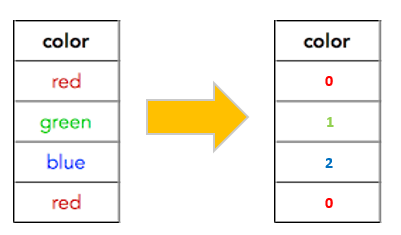

In [ ]:
cols = ["sex","embarked"]

In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit_transform(x_train["embarked"]) # 1차원 넣어야함.

array([2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2,
       2, 2, 1, 0, 0, 2, 2, 1, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 0, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2,
       2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 0, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 0, 2, 0, 1, 1, 0, 1, 2,
       0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,

- Ordinal encoding
    - 순서형 변수에 매우 적합한 인코딩 방식

In [ ]:
ordinal_dict = {
    1 : 0,
    2 : 1,
    3 : 2
}
x_train["pclass"].map(ordinal_dict)

0      0
1      1
2      2
3      2
4      2
      ..
707    2
708    0
709    2
710    0
711    0
Name: pclass, Length: 712, dtype: int64

In [ ]:
cols

['sex', 'embarked']

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
tmp = pd.DataFrame(
    enc.fit_transform(x_train[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
x_train = pd.concat([x_train,tmp],axis=1)
x_train.shape

(712, 12)

In [ ]:
tmp = pd.DataFrame(
    enc.transform(x_test[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
x_test = pd.concat([x_test,tmp],axis=1)
x_test.shape

(179, 12)

In [ ]:
x_train = x_train.drop(columns = cols)
x_test = x_test.drop(columns = cols)
x_train.shape, x_test.shape

((712, 10), (179, 10))

- 정답값

In [ ]:
y_train = df_train["survived"]
y_train.shape

(712,)

In [ ]:
y_test = df_test["survived"]
y_test.shape

(179,)

# Feature Scaling

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=SEED)
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=42)

In [ ]:
from sklearn.metrics import roc_auc_score

pred = model.predict_proba(x_test)[:,1]
roc_auc_score(y_test,pred)

0.8823680823680824

In [ ]:
x_train

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,45.5,0,0,28.5000,0.0,1.0,0.0,0.0,1.0
1,2,23.0,0,0,13.0000,0.0,1.0,0.0,0.0,1.0
2,3,32.0,0,0,7.9250,0.0,1.0,0.0,0.0,1.0
3,3,26.0,1,0,7.8542,0.0,1.0,0.0,0.0,1.0
4,3,6.0,4,2,31.2750,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
707,3,21.0,0,0,7.6500,1.0,0.0,0.0,0.0,1.0
708,1,28.0,0,0,31.0000,0.0,1.0,0.0,0.0,1.0
709,3,41.0,2,0,14.1083,0.0,1.0,0.0,0.0,1.0
710,1,14.0,1,2,120.0000,1.0,0.0,0.0,0.0,1.0


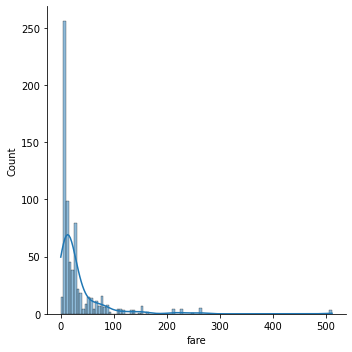

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(x_train["fare"],kde=True)
plt.show()

## Strandardization(표준화)
- 평균과 표준편차를 이용하여 모든 피쳐의 평균을 0 , 분산을 1인 값으로 변화
- 이상치가 있다면 평균와 표준편차에 영향을 미친다.

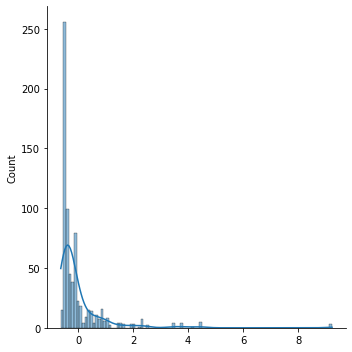

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_sc = scaler.fit_transform(x_train) # numpy 형태로 반환
sns.displot(x_train_sc[:,4],kde=True) # fare 가 4번째 인덱스에 있음 kde 곡선이 안그려짐
plt.show()

## Min-Max Scaling
- Features의 최소값, 최대값을 이용해서 0~1 사이에 값으로 정규화한다.

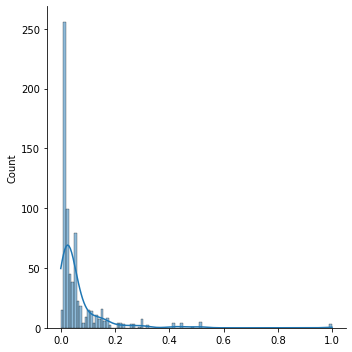

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_sc = scaler.fit_transform(x_train)

sns.displot(x_train_sc[:,4],kde=True)
plt.show()

## Power Transformation
- 거듭제곱 변환을 적용하여 데이터를 정규분포와 유사하게 변환

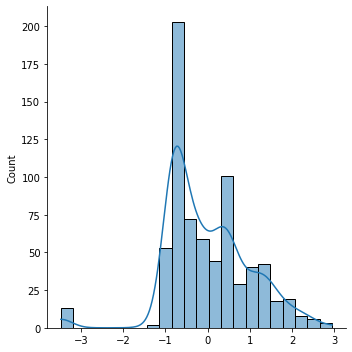

In [ ]:
from sklearn.preprocessing import PowerTransformer # 안좋음
scaler = PowerTransformer()
x_train_sc = scaler.fit_transform(x_train)
sns.displot(x_train_sc[:,4],kde=True)
plt.show()

## RobustScaler
- 평균과 분산대신 중간값과 사분위수 값 사용.
- 이상치 영향을 최소화

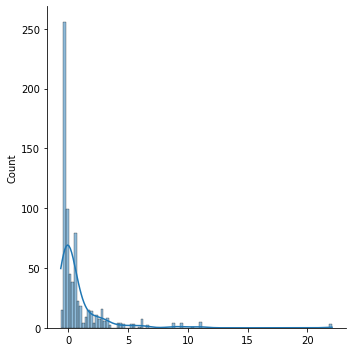

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train_sc = scaler.fit_transform(x_train)
sns.displot(x_train_sc[:,4],kde=True)
plt.show()

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)

model = LogisticRegression(random_state=SEED)
model.fit(scaler.transform(x_train),y_train)

pred = model.predict_proba(scaler.transform(x_test))[:,1]
roc_auc_score(y_test,pred)

0.8818532818532818

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)

model = LogisticRegression(random_state=SEED)
model.fit(scaler.transform(x_train),y_train)

pred = model.predict_proba(scaler.transform(x_test))[:,1]
roc_auc_score(y_test,pred)

0.8769626769626769

In [ ]:
scaler = PowerTransformer()
scaler.fit(x_train)

model = LogisticRegression(random_state=SEED)
model.fit(scaler.transform(x_train),y_train)

pred = model.predict_proba(scaler.transform(x_test))[:,1]
roc_auc_score(y_test,pred)

0.878893178893179

In [ ]:
scaler = RobustScaler()
scaler.fit(x_train)

model = LogisticRegression(random_state=SEED)
model.fit(scaler.transform(x_train),y_train)

pred = model.predict_proba(scaler.transform(x_test))[:,1]
roc_auc_score(y_test,pred)

0.8822393822393821